# Amazon Reviews on firetv products

### The scope of the project is to explore the reviews submitted by users and understand in depth about the recommendations

The outline for the project will be as follows- 
1. Understand and clean the data [Cleaned]
    - Check for null values
    - Drop columns which arent useful
2. Speculate whether ratings are genuine ? [Analysed]
    - what if the one user is trying to give all rating ?
    - How will the distribution look for bulk users ?
    - How many users are bulk ?
3. Find the NPS net promoter score of amazon
    - What's NPS score ?
    - How do we calculated for amazon  ?
4. Pick a product and deep dive [Picked Fire TV]
    - We will pick one variation of firetv product drill & analyse its characteristics
5. [Amazon firetv] - NPS score  ? [Calculated]
6. [Amazon firetv] - Plot time series for review [Ploted]
    - How to handle date time text ?
    - How to plot time series on a graph ? 
    - How does the graph look like in small intervals of 5 days or 10 days or 30 days ?
    - Did the performance (NPS) go up or down with time ?
7. [Amazon firetv] Is there any relationship in text length and rating
8. [Amazon firetv] Predict Recommendations based on reviews content
    - Make a clean function [All done in **2 ways NLTK and Custom**]
        - Remove punctuations
        - Remove stopwords
        - Stem vs Lemmatize
    - Create a TFIDF vectorizer [Applied: **TF-DF/ Doc2vec / word2vec / doc2bow / bag of words**]
    - Create Features 
    - Understand and explore sentiment analysis
        - Use compound feature [Created Compound features]
        - Apply LDA to identify Topics [**LDA topic analysis using Visualization**]
    - Use RandomForestClassifier  [Model applied and compared:  **RandomForestClassifier, LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, GaussianNB, SVC**]
    - Check the score [Applied several models and compared accuracy]
        

# 1. Understand and clean the data

- Check for null values
- Drop columns which arent useful


In [0]:
# ignoring warnings to remove clutter 
import warnings
warnings.filterwarnings('ignore')

In [0]:
import pandas as pd
import numpy as np

In [3]:
# Clean container
!rm *.*
!ls

sample_data


In [4]:
!wget https://s3.amazonaws.com/amplify-angular-app/dataset/critical-assessment-amazon-reviews-on-kindle/1429_1.csv
add = "1429_1.csv"

reviews = pd.read_csv(add,low_memory=False)
reviews.columns = ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer','date', 'dateAdded', 'dateSeen',
       'didPurchase', 'doRecommend', 'id','numHelpful', 'rating', 'sourceURLs','text', 'title', 'userCity',
       'userProvince', 'username']

--2018-12-12 05:58:15--  https://s3.amazonaws.com/amplify-angular-app/dataset/critical-assessment-amazon-reviews-on-kindle/1429_1.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.227.35
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.227.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48993673 (47M) [text/csv]
Saving to: ‘1429_1.csv’

1429_1.csv          100%[===================>]  46.72M  83.4MB/s    in 0.6s    

2018-12-12 05:58:16 (83.4 MB/s) - ‘1429_1.csv’ saved [48993673/48993673]



In [5]:
reviews.head()

,id,name,asins,brand,categories,keys,manufacturer,date,dateAdded,dateSeen,...,doRecommend,id,numHelpful,rating,sourceURLs,text,title,userCity,userProvince,username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [6]:
reviews.nunique() #get a count of unique values.

id                 42
name               48
asins              41
brand               6
categories         41
keys               42
manufacturer        2
date             1078
dateAdded        1941
dateSeen         3911
didPurchase         1
doRecommend         2
id                  1
numHelpful         97
rating              5
sourceURLs      11929
text            34659
title           19767
userCity            0
userProvince        0
username        26789
dtype: int64

There are lot of null values and irrelevant columns 

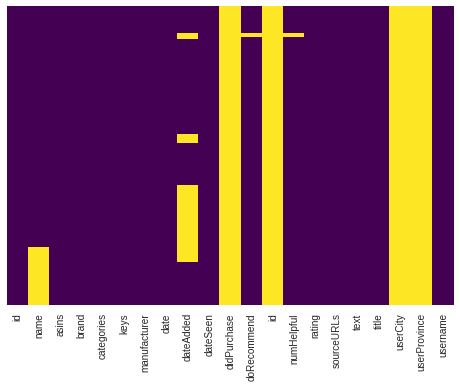

In [7]:
import seaborn as sns
# to check missing values
sns.heatmap(reviews.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
reviews.isnull().sum()
#lets drop usernames, userProvince,id,didPurchase

id                  0
name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
didPurchase     34659
doRecommend       594
id              34659
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
userCity        34660
userProvince    34660
username            2
dtype: int64

Good thing only one one text is blank.

In [0]:
# lets replace nan text with title
reviews.title.fillna('na', inplace=True)
reviews.text.fillna('na', inplace=True)
#reviews[reviews.text.isnull()]['text'] = 'na'
#reviews[reviews.text.isnull()]
#reviews['text'] = reviews.text.fillna(reviews.title, inplace=False)
#reviews[reviews.title.isnull()]

Lets drop columns which are not relevent for analysis.

In [0]:
reviews.drop(labels=['didPurchase','id','userCity','userProvince'],axis=1,inplace=True)

In [11]:
reviews.isnull().sum()

name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
doRecommend       594
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
username            2
dtype: int64

# 2. Speculate whether ratings are genuine ?
- what if the one user is trying to give all rating ?
- How will the distribution look for bulk users ?
- How many users are bulk ?

### Are the all the reviews given by same group of users ? 

In [12]:
rating_perperson=reviews.username.value_counts()
rating_perperson.head()

Mike     138
Chris     93
John      85
Dave      70
Bill      58
Name: username, dtype: int64

Total ratings : 34658
Total users : 26789
Users giving bulk ratings (more than 10) : 146
Bulk ratings : 3160
Populations of bulk ratings : 9.117664031392463
Populations of bulk users : 0.5449998133562283


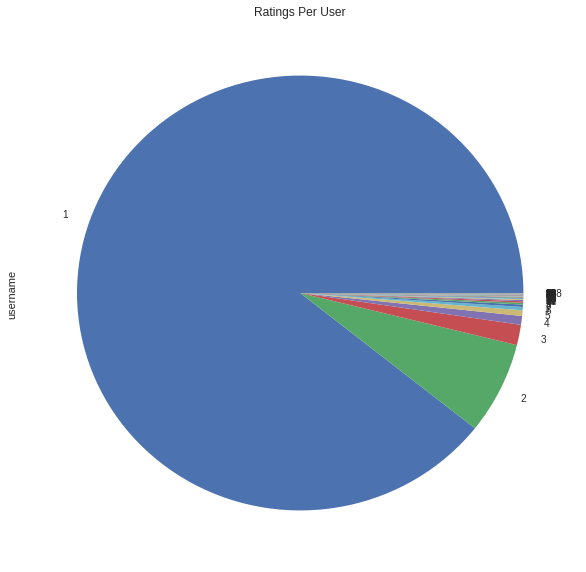

In [13]:
#ratings 
print ("Total ratings : " + str(sum(rating_perperson)))
print ("Total users : " + str(len(rating_perperson)))
print("Users giving bulk ratings (more than 10) : " + str(sum(rating_perperson >10)))
bulk = rating_perperson[rating_perperson >10]
bulk_rating = sum(bulk)
print ("Bulk ratings : " + str(bulk_rating))
print ("Populations of bulk ratings : " + str(bulk_rating*100/sum(rating_perperson)))
print ("Populations of bulk users : " + str(sum(rating_perperson >10)*100/len(rating_perperson)))
rating_perperson.value_counts().plot(kind='pie',figsize=(10,10), title='Ratings Per User')

#### Although the pie chart reveals that most of the users have given single rating but its interesting to note following fact
 #### 1 : Only 0.55 % of the users are bulk users
 #### 2 : Around 9 % of the ratings have been submitted by just 0.55% users - Does it seem odd to you ?

count    3158.000000
mean        4.593414
std         0.732940
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64
count    31469.000000
mean         4.583686
std          0.735930
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


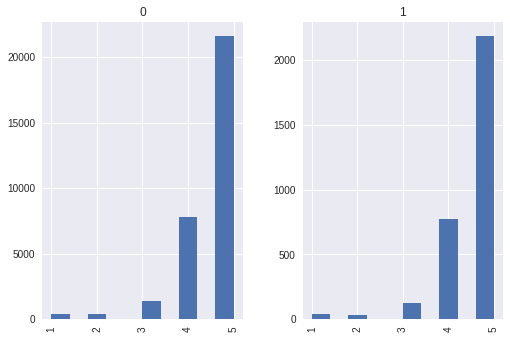

In [14]:
reviews['bulk']= reviews['username'].apply(lambda x : 1 if x in bulk.index else 0)
#gives us the category whether a rating is bulk or not
from matplotlib import pyplot
#series.hist(by=series)
print(reviews.rating.hist(by=reviews.bulk))
print(reviews[reviews.bulk==1].rating.describe())
print(reviews[reviews.bulk==0].rating.describe())

### Well ! that picture says it all. Now we dont think that bulk users are spam since the have the same rating distribution as others

### Distribution of User rating

*** Rating distribution ***
5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: rating, dtype: int64


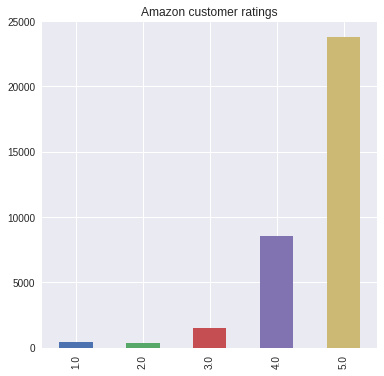

In [15]:
from matplotlib import pyplot
%matplotlib inline

star = reviews.rating.value_counts()
print("*** Rating distribution ***")
print(star)
star.sort_index(inplace=True)
star.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')

Most ratings are 5 star. As a whole reviews are positive.

# 3. Find the NPS net promoter score of amazon
- What's NPS score ?
- How do we calculated for amazon  ?

#### Looks like amazon is really good 

# NPS Score ( Net promoter score ) 

#### Net Promoters Score helps us evaluate customer satisfaction and loyalty

Rating 1,2,3 - Detractors <br>
Rating 4   - Passive <br>
Rating 5 - Promoters <br>

NPS = (Promoters - Detractors)/Total ratings * 100

In [16]:
NPS_score = round (100*((star.loc[5])-sum(star.loc[1:3]))/sum(star.loc[:]),2)
print (" NPS score of Amazon is : "  + str(NPS_score))


 NPS score of Amazon is : 61.99


# 4. Pick a product and deep dive
- We will pick one variation of firetv product drill & analyse its characteristics

Lets deep dive and pick product to analyse

In [17]:
len(reviews.name.unique())
reviews.name.unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Offers,,',
       'Amazon Kindle Lighted Leather Cover,,,\r\nAmazon Kindle Lighted Leather Cover,,,',
       'Amazon Kindle Lighted Leather Cover,,,\r\nKindle Keyboard,,,',
       'Kindle Keyboard,,,\r\nKindle Keyboard,,,',
       'All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 32 GB - Includes Special Offers, Magenta',
       'Fire HD 8 Tablet with Alexa, 8 HD Display, 32 GB, Tangerine - with Special Offers,',
       'Amazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 5W USB Official OEM Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,',
       'All-New Kindle E-reader - Black, 6 Glare-Free Touchscreen Display, Wi-Fi -  Includes Special Offers,,',
       'Amazon Kindle Fire Hd (3rd Generation)

In [0]:
# Amazon Fire Tv
firetv = reviews[reviews.name=='Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,']

In [19]:
firetv.isnull().sum()
# The dataset looks good to go. all important columns are not null

name               0
asins              0
brand              0
categories         0
keys               0
manufacturer       0
date               0
dateAdded       2527
dateSeen           0
doRecommend        0
numHelpful         0
rating             0
sourceURLs         0
text               0
title              1
username           0
bulk               0
dtype: int64

# 5. [Amazon firetv] - NPS score  ? 

In [20]:
firetv_s = firetv.rating.value_counts()
firetv_s

5.0    1832
4.0     565
3.0      90
2.0      21
1.0      19
Name: rating, dtype: int64

 NPS score of firetv is : 67.35


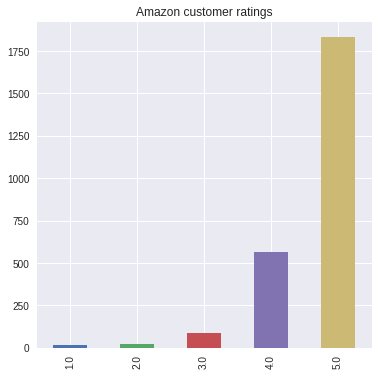

In [21]:
firetv_s.sort_index(inplace=True) # does sorting as per rating

firetv_NPS_score = round (100*(firetv_s[5]-sum(firetv_s[1:3]))/sum(firetv_s),2)
print (" NPS score of firetv is : "  + str(firetv_NPS_score))
#better NPS than overall amazon
firetv_s.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')

**Insight:** Fire TV has better NPS percent compare to Amazon overall NPS.

### What about recommendations ? How is rating related to recommendation ?

In [22]:
firetv.doRecommend.value_counts()

True     2424
False     103
Name: doRecommend, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd980ad22b0>,
      dtype=object)

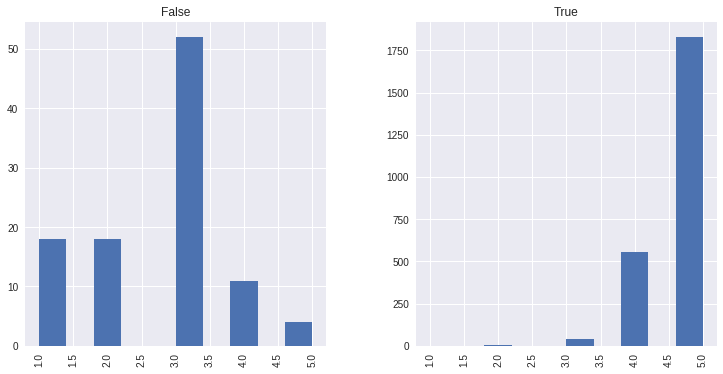

In [23]:
firetv.rating.hist(by=firetv.doRecommend,figsize=(12,6))

**Insight:** It's very clear usually user who give low rating did not recommend.

In [24]:
plus_firetv = firetv[firetv.doRecommend==True].rating.value_counts()
plus_firetv.sort_index(inplace=True)
recomm_NPS = round(100*(sum(plus_firetv[4:5])-sum(plus_firetv[1:2]))/sum(plus_firetv),2)
minus_firetv = firetv[firetv.doRecommend==False].rating.value_counts()
minus_firetv.sort_index(inplace=True)
notrecomm_NPS = round(100*(sum(minus_firetv[4:5])-sum(minus_firetv[1:2]))/sum(minus_firetv),2)
print("Those who recommend amazon firetv generate high NPS score of " + str(recomm_NPS))
print("Those who DO NOT recommend firetv produce a NPS score of " + str(notrecomm_NPS))
print(" ~ pretty much correct definition of NPS score")


Those who recommend amazon firetv generate high NPS score of 98.1
Those who DO NOT recommend firetv produce a NPS score of -20.39
 ~ pretty much correct definition of NPS score


# 6. [Amazon firetv] - Plot time series for reviews 
- How to handle date time text ?
- How to plot time series on a graph ? 
- How does the graph look like in small intervals of 5 days or 10 days or 30 days ?
- Did the performance (NPS) go up or down with time ?


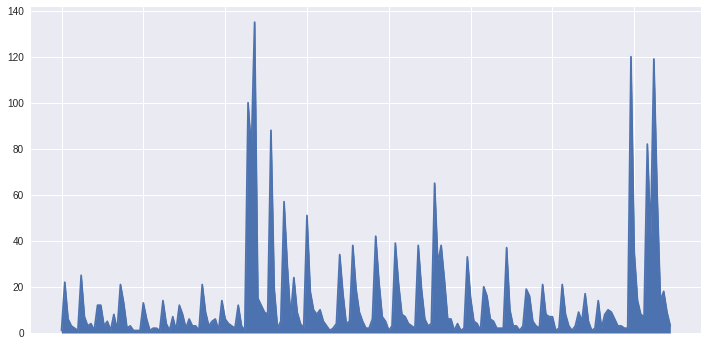

In [25]:
firetv['temp'] = firetv.date.apply(lambda x : pd.to_datetime(x))
firetv_review_dates = firetv.date.value_counts()
firetv_review_dates.sort_index(inplace=True)
firetv_review_dates.plot(kind='area',figsize=(12,6))

In [26]:
rating_perdate = firetv_review_dates.sort_values(ascending=False)
peakrating = rating_perdate[:20]
peakrating

2017-01-18T00:00:00.000Z    135
2017-09-15T00:00:00.000Z    120
2017-09-22T00:00:00.000Z    119
2017-01-16T00:00:00.000Z    100
2017-01-23T00:00:00.000Z     88
2017-09-20T00:00:00.000Z     82
2017-01-17T00:00:00.000Z     79
2017-03-15T00:00:00.000Z     65
2017-09-23T00:00:00.000Z     60
2017-01-27T00:00:00.000Z     57
2017-02-03T00:00:00.000Z     51
2017-09-21T00:00:00.000Z     42
2017-02-24T00:00:00.000Z     42
2017-03-03T00:00:00.000Z     39
2017-02-17T00:00:00.000Z     38
2017-03-17T00:00:00.000Z     38
2017-03-10T00:00:00.000Z     38
2017-04-07T00:00:00.000Z     37
2017-09-16T00:00:00.000Z     35
2017-02-13T00:00:00.000Z     34
Name: date, dtype: int64

In [27]:
peak_month=[]
for x in peakrating.index:
    peak_month.append(pd.to_datetime(x).month)
pd.Series(peak_month).value_counts()

9    6
1    5
3    4
2    4
4    1
dtype: int64

#### Insight 
1. September and January month have the highest number of peaks >> Activity is high. It make sanse, Father's Day and back-to-school season, which run from June through September, is another good time to find deals on TVs.
2. There is high degree of variance in reviews added over time



In [0]:
rating_series = pd.DataFrame(firetv.date)
dforms=[]
for x in rating_series.date:
    dforms.append((pd.to_datetime(x)).value)

In [29]:
# now we have dforms which has dates transformed to numeric values
rating2 = rating_series.assign(date_min = dforms) # added column date_min
rating2.reset_index(inplace=True)
rating2.head()

,index,date,date_min
0,25352,2017-09-06T00:00:00.000Z,1504656000000000000
1,25353,2017-09-06T00:00:00.000Z,1504656000000000000
2,25354,2017-09-04T00:00:00.000Z,1504483200000000000
3,25355,2017-09-04T00:00:00.000Z,1504483200000000000
4,25356,2017-09-04T00:00:00.000Z,1504483200000000000


In [30]:
#rating2.set_index('date_min')
#rating2.columns=['timestamp_string','review_count','date_min']
bins = np.linspace(min(rating2.date_min),max(rating2.date_min),num=50)
bins

array([1.46491200e+18, 1.46576013e+18, 1.46660826e+18, 1.46745639e+18,
       1.46830452e+18, 1.46915265e+18, 1.47000078e+18, 1.47084891e+18,
       1.47169704e+18, 1.47254518e+18, 1.47339331e+18, 1.47424144e+18,
       1.47508957e+18, 1.47593770e+18, 1.47678583e+18, 1.47763396e+18,
       1.47848209e+18, 1.47933022e+18, 1.48017835e+18, 1.48102648e+18,
       1.48187461e+18, 1.48272274e+18, 1.48357087e+18, 1.48441900e+18,
       1.48526713e+18, 1.48611527e+18, 1.48696340e+18, 1.48781153e+18,
       1.48865966e+18, 1.48950779e+18, 1.49035592e+18, 1.49120405e+18,
       1.49205218e+18, 1.49290031e+18, 1.49374844e+18, 1.49459657e+18,
       1.49544470e+18, 1.49629283e+18, 1.49714096e+18, 1.49798909e+18,
       1.49883722e+18, 1.49968536e+18, 1.50053349e+18, 1.50138162e+18,
       1.50222975e+18, 1.50307788e+18, 1.50392601e+18, 1.50477414e+18,
       1.50562227e+18, 1.50647040e+18])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd98092a438>]],
      dtype=object)

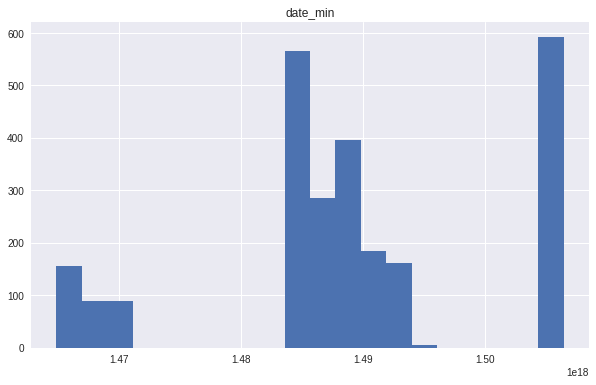

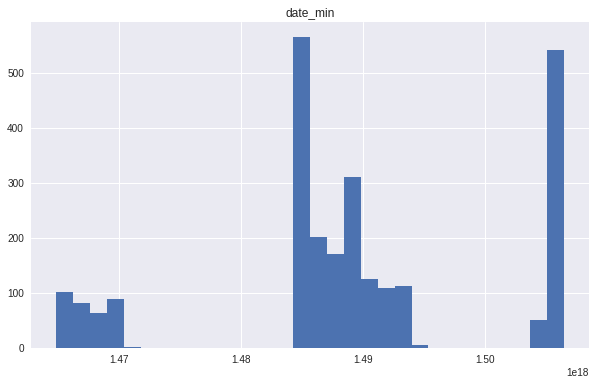

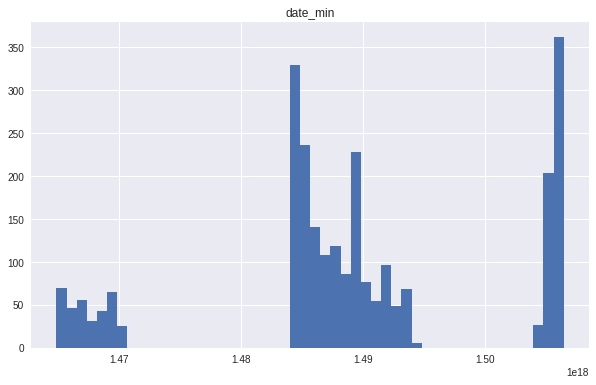

In [31]:
rating2.hist(column='date_min', bins=20,figsize=(10,6),)
rating2.hist(column='date_min', bins=30,figsize=(10,6))
rating2.hist(column='date_min', bins=50,figsize=(10,6))


In [0]:
def NPS_eval (A):
    score =0
    for x in A[:]:
        if (x>4) :
            score+=1
        elif (x<4) :
            score-=1
    return 100*score/len(A)    

In [33]:
NPS_overtime = firetv[['temp','rating']] # temp is date conversion of 'date' column
NPS_overtime.head()

,temp,rating
25352,2017-09-06,5.0
25353,2017-09-06,5.0
25354,2017-09-04,5.0
25355,2017-09-04,5.0
25356,2017-09-04,5.0


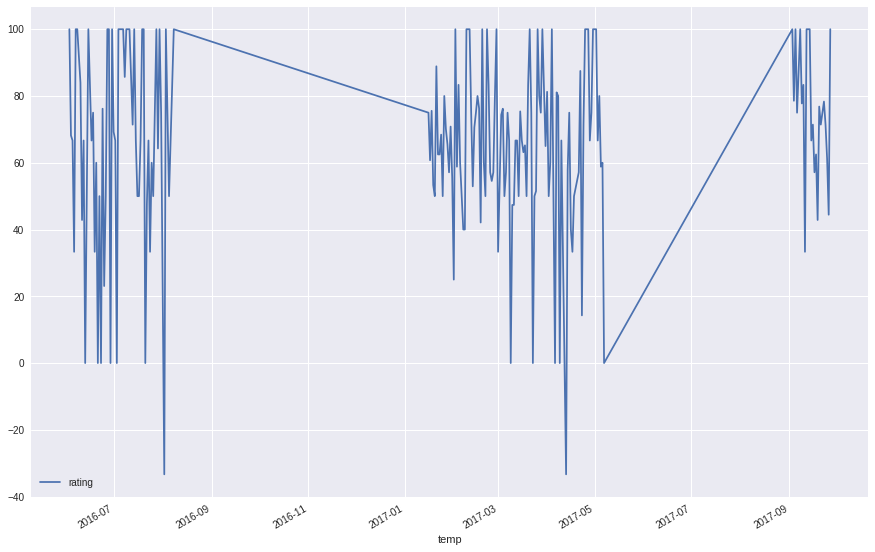

In [34]:
# NPS as per dates
NPS_overtime.groupby(by='temp').agg(NPS_eval).plot(figsize=(15,10))

In [35]:
NPS_overtime['timeline'] = NPS_overtime['temp'].apply(lambda x : (x.month+(12*(x.year-2015)))) # Total number of months after product release
NPS_overtime['timeline'].head()

25352    33
25353    33
25354    33
25355    33
25356    33
Name: timeline, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


,rating
timeline,
20,47.619048
26,63.095238
18,63.522013
27,65.206813
28,65.258216
29,65.853659
19,67.948718
25,68.561873
33,72.466216


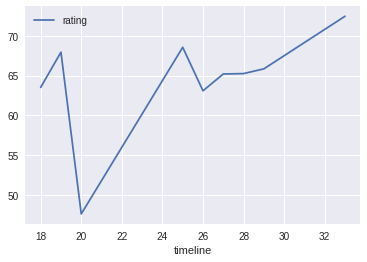

In [36]:
NPS_by_month= NPS_overtime.groupby(by='timeline').agg(NPS_eval)
print(NPS_by_month.plot())
NPS_by_month.sort_values(by='rating')

**Insight:** Over time NPS rating gradually going up. which shows customer satisfaction and acceptance of product.

# 7. [Amazon firetv] Is there any relationship in text length and rating

In [37]:
firetv['textlength'] = firetv['text'].apply(len)
firetv.head(1)

,name,asins,brand,categories,keys,manufacturer,date,dateAdded,dateSeen,doRecommend,numHelpful,rating,sourceURLs,text,title,username,bulk,temp,textlength
25352,"Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-09-06T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-12T00:00:00Z",True,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,"Echo is learning everyday and its uses daily, ...",Echo white,JvC1,0,2017-09-06,104


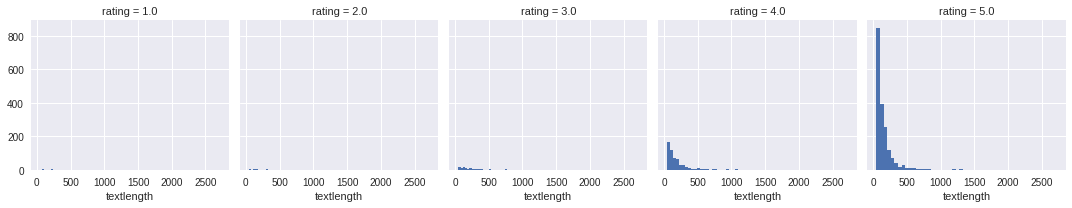

In [38]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(data=firetv, col='rating')
g.map(plt.hist, 'textlength', bins=50)

**Insight:** Seems like overall, the distribution of text length is similar across all five ratings. However, the number of text reviews seems to be skewed a lot higher towards the 4-star and 5-star ratings. This may cause some issues later on in the process.

Let’s create a box plot of the text length for each star rating.

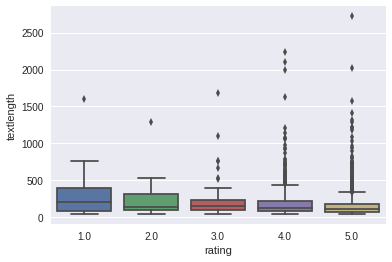

In [39]:
sns.boxplot(x='rating', y='textlength', data=firetv)

**Insight:** From the plot, looks like the 1-star and 2-star ratings have much longer text, but there are many outliers (which can be seen as points above the boxes). Because of this, maybe text length won’t be such a useful feature to consider after all.

# 8. [Amazon firetv] Predict Recommendations based on reviews content
- Make a clean function
  - Remove punctuations
  - Remove stopwords
  - Stem vs Lemmatize
- Create a TFIDF vectorizer
- Create Features
- Understand and explore sentiment analysis
    - Use compound feature
- Use RandomForestClassifier
- Check the score 
        

## Can we predict Recommendations with given comments on product ?

In [0]:
comments = pd.concat([firetv['text']+". "+ firetv['title'],firetv['rating'],firetv['doRecommend']],axis=1)
comments.columns=['text','rating','recommend']

In [41]:
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import PorterStemmer
import re 

stopwords = nltk.corpus.stopwords.words('english')
ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()


def clean_stem (sent): 
    #print(sent)
    temp1 ="".join(x for x in sent if x not in string.punctuation)  #Removed punctuations, stopwords other place also doing custom way
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [ps.stem(x) for x in temp2 if x not in stopwords]
    return temp3

def clean_lemma (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [wn.lemmatize(x) for x in temp2 if x not in stopwords]
    return temp3

# lets test with sample text 
text="Hello this is, my happiest place. organize, organizes, and organizing in Happy world ! with happiness ..\
so much of happy!! "

print("Stemmed " + "-".join(clean_stem(text)))
print("Lemmatized " + "-".join(clean_lemma(text)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Stemmed hello-happiest-place-organ-organ-organ-happi-world-happi-much-happi-
Lemmatized hello-happiest-place-organize-organizes-organizing-happy-world-happiness-much-happy-


### Let's create vectors from the text columns

In [42]:
# Replacing NaN in case left over by anyway
comments.text.fillna('no comment', inplace=True)
comments[comments.text.isnull()]

,text,rating,recommend


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectstem = TfidfVectorizer(analyzer=clean_stem)
vectlemm = TfidfVectorizer(analyzer=clean_lemma)

textfeatures=vectstem.fit_transform(comments['text'])
print("Stemmed - " + str(len(vectstem.get_feature_names())))

vectlemm.fit_transform(comments['text'])
print("Lemmatized - " + str(len(vectlemm.get_feature_names())))


Stemmed - 3271
Lemmatized - 4025


Stemmed has features 19 % lower than that of Lemmatized. 
    - In the above example in happy line, you can see how ineffective lemmatization can be 
    - Thus we will be applying cleanstem algo here
    - Lower features means more information density in the compressed columns

### Lets have a look on our stemmed data

In [44]:
pd.DataFrame(textfeatures.toarray()).head(15)

,0,1,2,3,4,5,6,7,8,9,...,3261,3262,3263,3264,3265,3266,3267,3268,3269,3270
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.159143,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.181083,0.0,0.0,0.0
6,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.344961,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


The column names dont make sense - Need to update them with real words
    - for this we use vectstem.vocabulary_ to modify the columns

In [45]:
textmatrix = pd.DataFrame(textfeatures.toarray(),columns=vectstem.vocabulary_)
textmatrix.head(5)

,echo,learn,everyday,use,daili,place,speaker,connect,phone,white,...,pictur,ideal,wheelchair,bound,sofa,outrag,fund,board,upstairsnot,needsi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
sum_scores = pd.DataFrame(textmatrix.sum(),columns=['sum_scores_TFIDF'])
sum_scores.head(10)

,sum_scores_TFIDF
echo,6.580844
learn,3.402510
everyday,1.047986
use,2.820938
daili,0.520490
place,0.226937
speaker,0.336460
connect,0.451159
phone,0.248420
white,0.239706


In [47]:
# Need to see most important words in the reviews
# words used by many people or less frequent in sentences
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=True)[:5] 

,sum_scores_TFIDF
adventur,0.06952
toogreat,0.06952
commut,0.06952
spi,0.06952
privat,0.06952


In [48]:
#high usage of words in reviews
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=False)[:5]

,sum_scores_TFIDF
paus,162.221216
stereophonograph,144.352277
afar,128.648316
microphon,125.445930
dothat,112.660115


### Lets build features on our data


In [49]:
pd.set_option('display.max_colwidth', 0) #will help to show all the text strings in the column. -1
comments.head()

,text,rating,recommend
25352,"Echo is learning everyday and its uses daily, i use it in place of a speaker and connect my phone to it.. Echo white",5.0,True
25353,"Echo is learning everyday and its uses daily, the fact that's it Bluetooth is awesome.. Echo black",5.0,True
25354,"Speaker quality is better than expected, works well in the living room, convenient addition. Great speaker",5.0,True
25355,Excellent product. It's well worth the money. I have my system linked to my Iris Security System. Excellent Product,5.0,True
25356,This is our 2nd Amazon Echo already. We got the black in in our living room & this on outlr master's bedroom. They are amazing products!. Great Product,5.0,True


### > Insight(Important): 
After skimming random reviews I got surprised why people are writing about Alexa, Echo in Fire TV product section. After doing data enrichment by google search I got to know in 2017 Amazon was selling Fire TV with Alexa voice remote (E.g. [Deal](https://www.google.com/search?ei=CoUQXJa_KpC-0PEPj-ml8AY&q=fire+tv+alexa+2017+deals&oq=fire+tv+alexa+2017+deals&gs_l=psy-ab.3...1308.5350..5563...1.0..0.87.524.7......0....1..gws-wiz.......0i71j0i22i10i30j33i22i29i30j33i160.GSNrKchLM54): New 2017 Fire TV with 4K and Alexa Voice Remote). Now it make sense why people reviewed Alexa voice with Fire TV. Let's analyze reviews as combined bundle.

Sentiment analysis to predict recommendation and rank reviews:

In [50]:
# Test and understand code for sentiment using NLTK
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

happy = "I am Happy. this is so awesome. I love life. I will be in heaven"
#when you find free food in university
print("happy " + str(sid.polarity_scores(text)))


sad = "i hate this. I am mad this is stupid. I will kill you"
#when your professor gives you a ZERO in assignment
print("sad " + str(sid.polarity_scores(sad)))

neut = "I will come. You should go. This is blue color"
#when you state facts and nothing else
print("dont care - " + str(sid.polarity_scores(neut)))

srishti = "money"
print("dss - " + str(sid.polarity_scores(srishti)))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
happy {'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'compound': 0.9522}
sad {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.9432}
dont care - {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dss - {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


#### Understand the output
    - sid.polarity is a dictionary
    - pos and neg indicates - positive and negative emotions in sentence
    - we should be interested in compund score which calculates the final effect
   

In [0]:
# Feature 1 : Sentiment compound value
def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']
    
#sentiment(happy)
comments['sentiment']= comments['text'].apply(lambda x : sentiment(x))

In [52]:
# Feature 2 : Length of string

comments['length'] = comments['text'].apply(lambda x : len(re.split('\W+',x))) # no of works
comments[comments['rating']==5].head(10)

# before we proceed - we need to convert all true >> 1 and false as 0
def convert(x):
    
    if x==True:
        return 1
    else :
        return 0
    
print(convert("False"))

comments['target_rec'] = comments['recommend'].apply(lambda x : convert(x))
comments.head(5)

0


,text,rating,recommend,sentiment,length,target_rec
25352,"Echo is learning everyday and its uses daily, i use it in place of a speaker and connect my phone to it.. Echo white",5.0,True,0.0000,24,1
25353,"Echo is learning everyday and its uses daily, the fact that's it Bluetooth is awesome.. Echo black",5.0,True,0.0000,18,1
25354,"Speaker quality is better than expected, works well in the living room, convenient addition. Great speaker",5.0,True,0.8442,16,1
25355,Excellent product. It's well worth the money. I have my system linked to my Iris Security System. Excellent Product,5.0,True,0.9153,20,1
25356,This is our 2nd Amazon Echo already. We got the black in in our living room & this on outlr master's bedroom. They are amazing products!. Great Product,5.0,True,0.8718,28,1


In [53]:
comments[comments['rating']==1].head(5)

,text,rating,recommend,sentiment,length,target_rec
25399,I tried to set it up for over an hour and it wouldn't connect to my wifi. The orange ring didn't last more than 30 sec to even give it a chance. It just sat their with the ring of death no matter how quick I was. Powered my router off and back on even. My other devices were connected just fine before and after. So frustrated and no matter how hard I tried it didn't work so I just took it back and got a refund. Totally disappointed!. Totally disappointed,1.0,False,-0.9238,94,0
25782,"Will not stay connected to WiFi. When it is connected, device has to be within 6-8 ft. of router. Need this in the kitchen. Don't want to walk 25+ feet to use it. My other wifi devices work everywhere in the house as well as most of yard and garden. So I don't get it. Sick of looking at it - useless.. USELESS",1.0,False,0.0121,65,0
25797,Review is based on the fact that I have not able to make a connection with the device.. Connection,1.0,False,0.0000,19,0
25864,I love how easy it is to use and setup the Echo you just plug it in and you are ready to go.. Echo,1.0,True,0.8625,24,1
25932,Alexa is not able to answer more than basic querys. Don't see much benefit from the product,1.0,False,-0.3570,18,0


### Lets predict recommendation !

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

# need to reset index of the comments column to match with textfeatures
new_sentiment = comments.sentiment.reset_index()['sentiment']
new_length = comments.length.reset_index()['length']

x_features = pd.concat([new_sentiment,new_length,
                        pd.DataFrame(textfeatures.toarray(),
                        columns=vectstem.vocabulary_)],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_features,comments.target_rec,test_size=0.2)

rf = RandomForestClassifier(n_jobs=-1,n_estimators=50,max_depth=90)
rfmodel=rf.fit(x_train,y_train)

y_pred = rfmodel.predict(x_test)
sorted(zip(rfmodel.feature_importances_,x_train.columns),reverse=True)[0:10]
#Importante words

[(0.05142591104984847, 'sentiment'),
 (0.03143116294069542, 'awkward'),
 (0.017812487490201222, 'gym'),
 (0.013784911685331181, 'worri'),
 (0.013067500721975578, 'hard'),
 (0.012413074518479016, 'adult'),
 (0.00993589049468814, 'length'),
 (0.009921505111088594, 'qvc'),
 (0.009429337915648152, 'guess'),
 (0.00935639305531138, 'correct')]

In [55]:
precision, recall, fscore , support = score(y_test,y_pred,average='binary')
print('Precision: {} / Recall :{} / Accuracy {} '.format(round(precision,3),
                                                         round(recall,3),
                                                         round((y_pred==y_test).sum()/len(y_test),3)))

Precision: 0.962 / Recall :1.0 / Accuracy 0.962 


Model is predicted at 96.4% accuracy.

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9624505928853755
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.96      1.00      0.98       487

   micro avg       0.96      0.96      0.96       506
   macro avg       0.48      0.50      0.49       506
weighted avg       0.93      0.96      0.94       506



In [57]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[  0  19]
 [  0 487]]


Result: This model did not work as F1 score for Label 'Not Recommended' is 0 which is worse. Will apply other models.

#### Comment ranking for recommendation 
This ranking (0-5 High) shows how likely user can recommend.

In [58]:
# Ranking
def getRank(num):
  num = num * 100
  if(num > 90):
    return 5
  elif(num > 80):
    return 4
  elif(num > 70):
    return 3
  elif(num > 55):
    return 2
  else:
    return 1

#y_pred
a = rfmodel.predict_proba(x_test)#.apply(lambda x : getRank(x)) np.asmatrix(a)
list(map(lambda x : getRank(x), a[:,1]) )[:10] # for testing just selecting 10


[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]

#### Model compare
Lets compare with other models.

LR: 0.994853 (0.005150)
KNN: 0.997417 (0.004166)
CART: 0.979864 (0.010488)
NB: 0.842535 (0.020051)
RF: 0.999492 (0.001523)
SVM: 1.000000 (0.000000)


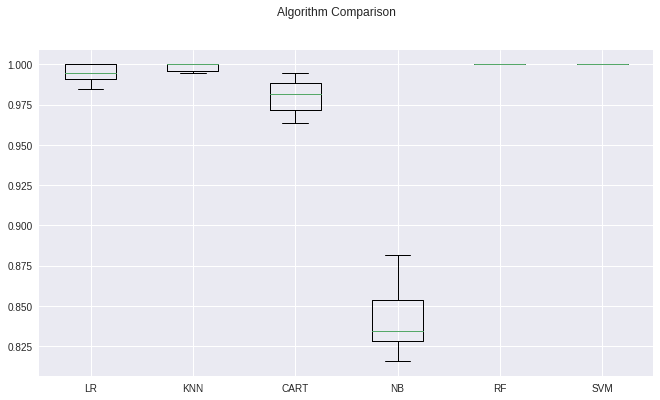

In [59]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score 
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# prepare models
models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
#models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=20)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

SVM is perfect model with 100% accuracy.

### Doc2vec - predict recommendation using LogisticRegression !

In [0]:
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

In [0]:
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(TaggedDocument(v.split(), [label]))
    return labeled

In [62]:
nltk.download('stopwords')
from nltk.corpus import stopwords  # stop words are, is, the etc. which are not needed for model
# Corpus cleaning
STOPWORDS = set(stopwords.words('english'))
def clean_str(string):
    """
    Tokenization/string cleaning for datasets.
    Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
    """
    string = re.sub(r"^b", "", string)
    string = re.sub(r"\\n ", "", string)
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'ve", "", string)
    string = re.sub(r"n\'t", "", string)
    string = re.sub(r"\'re", "", string)
    string = re.sub(r"\'d", "", string)
    string = re.sub(r"\'ll", "", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", "", string)
    string = re.sub(r"'", "", string)
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"[0-9]\w+|[0-9]","", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = ' '.join(Word(word).lemmatize() for word in string.split() if word not in STOPWORDS) # delete stopwors from text

    return string.strip().lower()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
# Cleaning text
!pip install textblob
import nltk
nltk.download('wordnet')
from textblob import Word
comments['comment_text_clean'] = comments.text.apply(lambda x : clean_str(x))  # calling clean for all rows

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(comments.comment_text_clean, comments.target_rec, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_text = X_train + X_test

In [65]:
all_text[:4]

[TaggedDocument(words=['we', 'ca', 'get', 'enough', '!', 'we', 'use', 'daily', 'even', 'kiddo', 'use', 'love', 'echo'], tags=['Train_0']),
 TaggedDocument(words=['our', 'family', 'made', 'echo', 'part', 'ordinary', 'day', 'day', 'life', 'playing', 'music', 'asking', 'question', 'playing', 'thing', 'alexa', 'fun', 'useful', 'would', 'think'], tags=['Train_1']),
 TaggedDocument(words=['this', 'best', 'assistant', 'market', 'voice', 'recognition', 'great', 'amazon', 'echo'], tags=['Train_2']),
 TaggedDocument(words=['not', 'smart', 'google', 'nice', 'wife', 'jealous', 'nice'], tags=['Train_3'])]

In [66]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, min_count=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(all_text)])

100%|██████████| 2527/2527 [00:00<00:00, 1239504.88it/s]


In [67]:
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(all_text)]), total_examples=len(all_text), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 2527/2527 [00:00<00:00, 1889642.75it/s]


In [0]:
def get_vectors(model, corpus_size, vectors_size, vectors_type):
    """
    Get vectors from trained doc2vec model
    :param doc2vec_model: Trained Doc2Vec model
    :param corpus_size: Size of the data
    :param vectors_size: Size of the embedding vectors
    :param vectors_type: Training or Testing vectors
    :return: list of vectors
    """
    vectors = np.zeros((corpus_size, vectors_size))
    for i in range(0, corpus_size):
        prefix = vectors_type + '_' + str(i)
        vectors[i] = model.docvecs[prefix]
    return vectors

In [0]:
train_vectors_dbow = get_vectors(model_dbow, len(X_train), 300, 'Train')
test_vectors_dbow = get_vectors(model_dbow, len(X_test), 300, 'Test')

#### Model Training with Doc2Vec

In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(train_vectors_dbow, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [0]:
logreg = logreg.fit(train_vectors_dbow, y_train)
y_pred = logreg.predict(test_vectors_dbow)

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9446640316205533
              precision    recall  f1-score   support

           0       0.34      0.48      0.40        29
           1       0.98      0.96      0.97       730

   micro avg       0.94      0.94      0.94       759
   macro avg       0.66      0.72      0.69       759
weighted avg       0.95      0.94      0.95       759



**Insight:** With Doc2Vec accuracy went down(93%). Which make sense because sentiments usually defined at word level.
As we know F1 score reaches its best value at 1 and worst score at 0. This model did not perform well for predicting 'Not Recommended' as f1-score is 0.23 however 'Recommended' label performed well.

In [73]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 14  15]
 [ 27 703]]


As F1-score also suggested predicting label  'Not Recommended' does not work well, we can also see in matrix.

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

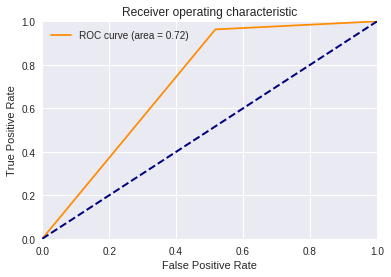

In [75]:
# Get ROC curve for Logistic Regression
get_roc(y_test,y_pred)

As the area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test. Not very good may be due to label 'Not Recommended' did not work well.

### Support Vector Machine

In [0]:
X = comments.comment_text_clean
y = comments.target_rec
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

accuracy 0.9538866930171278
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.95      1.00      0.98       724

   micro avg       0.95      0.95      0.95       759
   macro avg       0.48      0.50      0.49       759
weighted avg       0.91      0.95      0.93       759



In [79]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[  0  35]
 [  0 724]]


Result: As F1-score also suggested predicting label 'Not Recommended' does not work well, we can also see in matrix. F1 Score is worse for Not recommended products. Looks like Logistic Regression was better.

## How does Word Vectors look? What do they say?

In [0]:
import nltk
import re

from gensim.models import word2vec
from sklearn.manifold import TSNE

In [81]:
nltk.download('stopwords') # need to reload if using
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')

def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in data.iteritems():
        #print(sentence[1])
        strtxt = clean_stem(sentence[1])
        #word_list = strtxt.split(" ")
        corpus.append(strtxt)
            
    return corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
corpus = build_corpus(comments.text)   

In [0]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

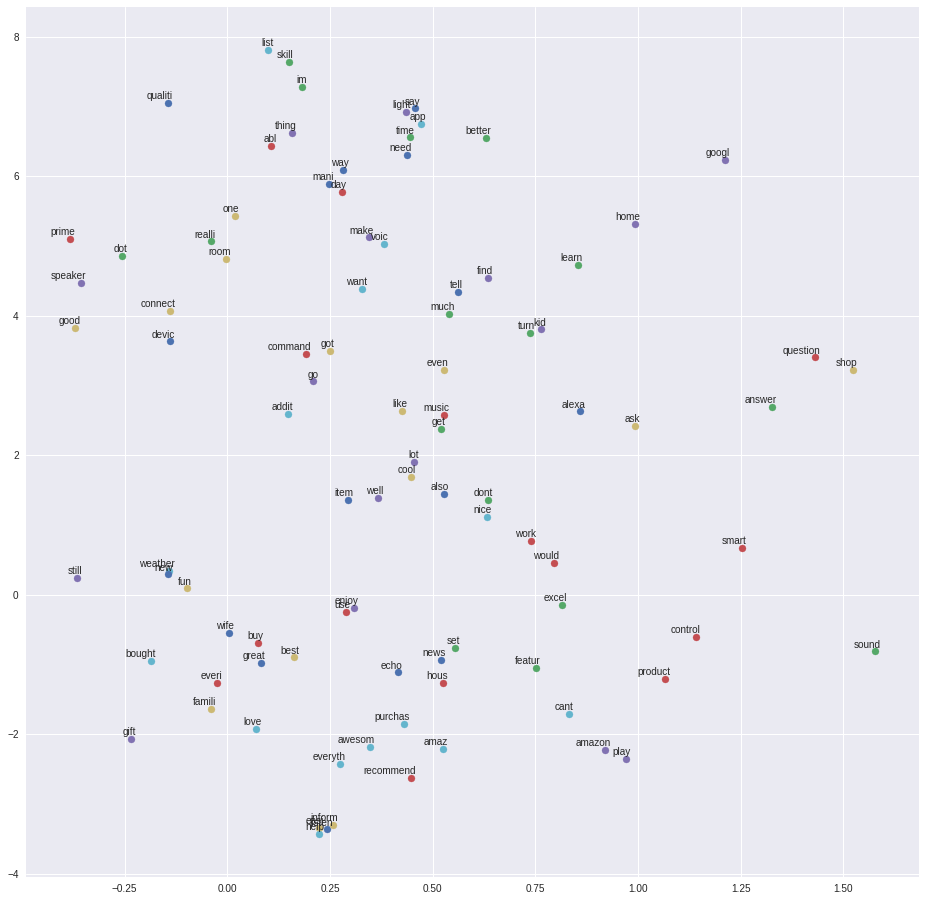

In [84]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
tsne_plot(model)

In [85]:
model.most_similar('good')

[('would', 0.9997392892837524),
 ('product', 0.999714732170105),
 ('need', 0.9996973276138306),
 ('want', 0.9996728897094727),
 ('way', 0.999657154083252),
 ('room', 0.9996567964553833),
 ('go', 0.9996532797813416),
 ('speaker', 0.999639630317688),
 ('im', 0.9996336698532104),
 ('enjoy', 0.9996286034584045)]

**Insight:** Most of the words are showing positive sentiments which justifies significant number of 5-star ratings.

## What are the most used words for recommendation?
Let's draw Word Cloud.

In [86]:
!pip install wordcloud
from PIL import Image
from io import BytesIO
import requests
from wordcloud import WordCloud, STOPWORDS  #install $ pip install wordcloud

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

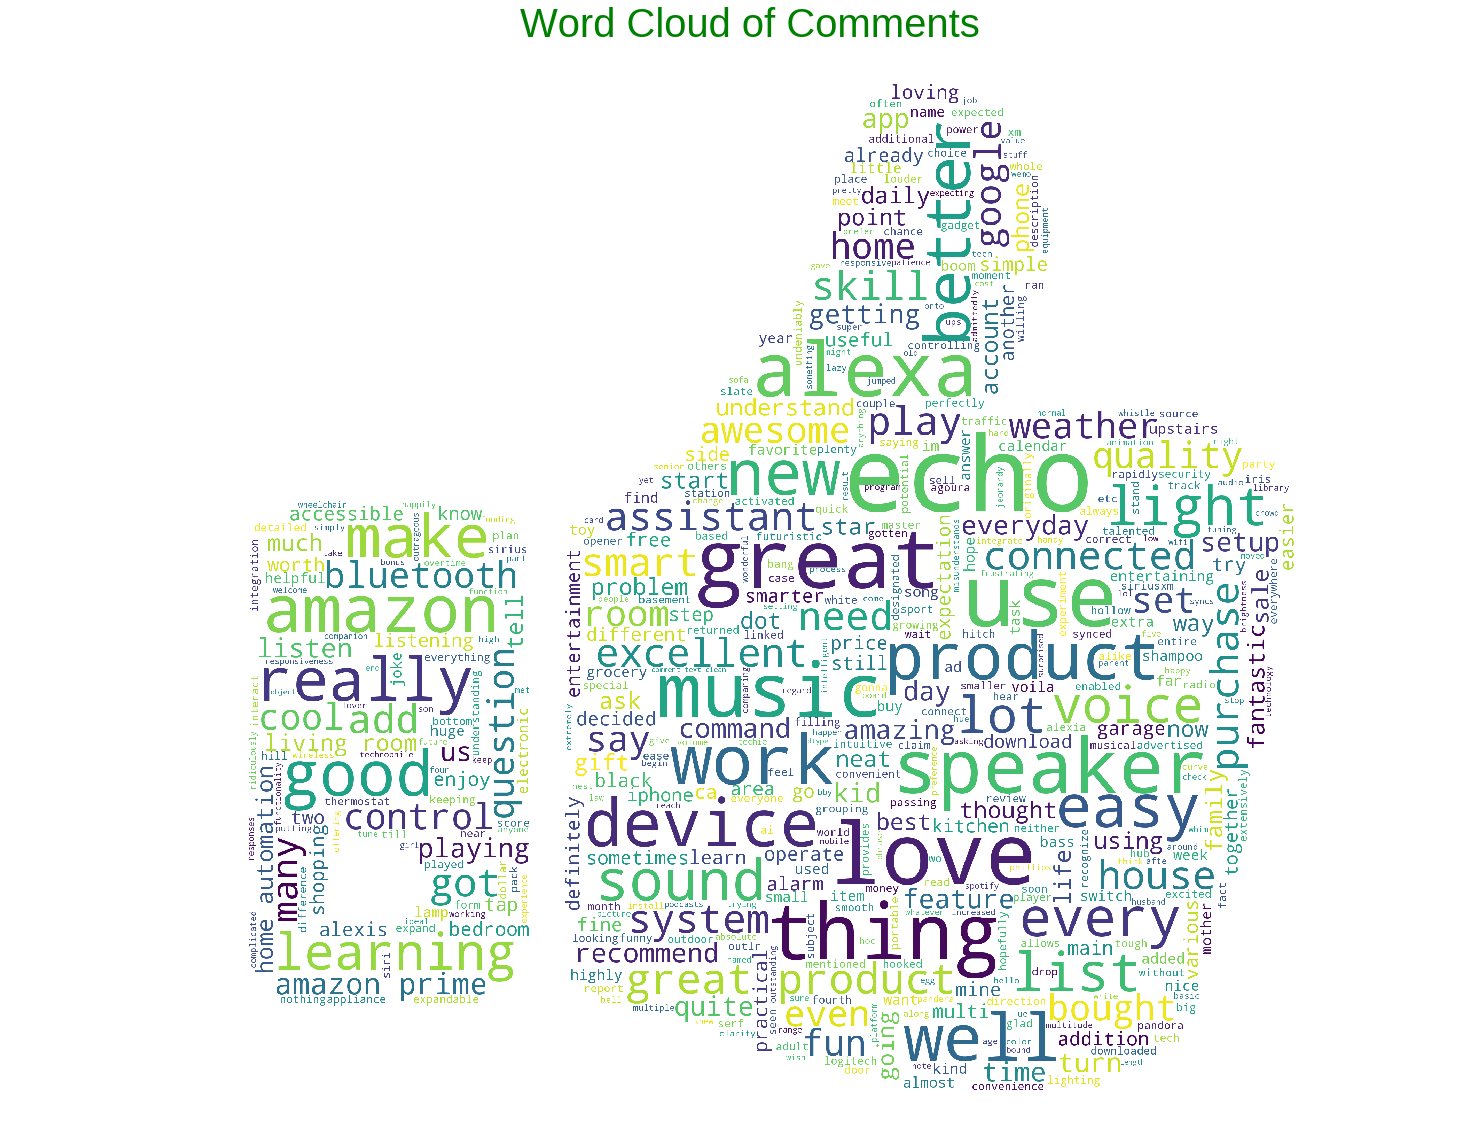

In [87]:
#Word cloud for recommendation
response = requests.get('https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png')
upvote_mask = np.array(Image.open(BytesIO(response.content)))#https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png
plot_wordcloud(comments[comments["target_rec"]==1]["comment_text_clean"], upvote_mask, max_words=1000, max_font_size=300, title="Word Cloud of Comments")

**Insight:** Word cloud why people did recommendation with words like love, great, easy, well, quality etc.

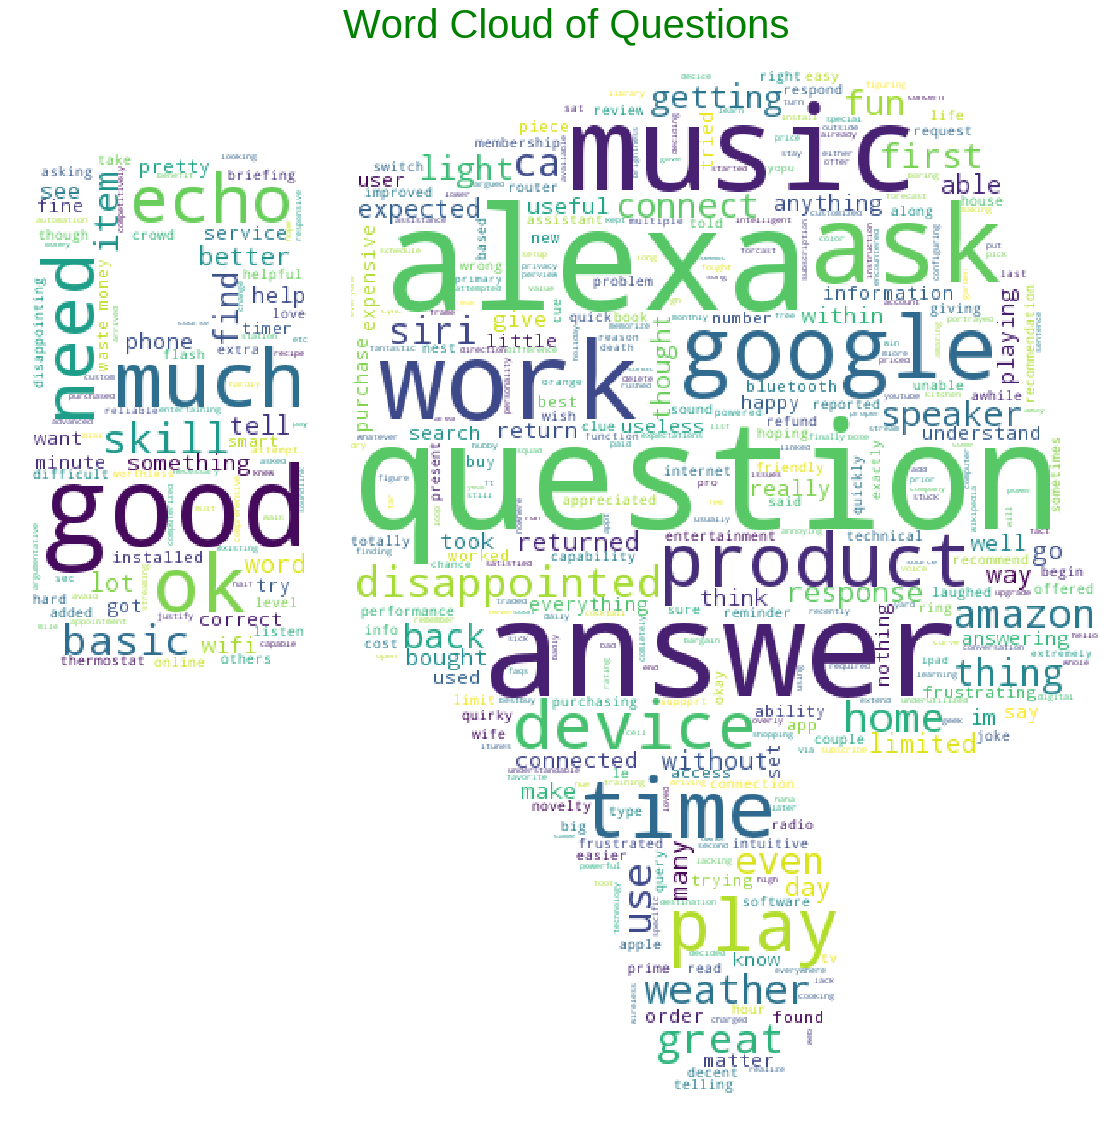

In [88]:
#Word cloud for Not Recommendation
response = requests.get('https://image.freepik.com/free-icon/thumbs-down-silhouette_318-41911.jpg')
upvote_mask = np.array(Image.open(BytesIO(response.content)))#https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png
plot_wordcloud(comments[comments["target_rec"]==0]["comment_text_clean"], upvote_mask, max_words=300000, max_font_size=300, title="Word Cloud of Questions")

**Insight:** Non recommended reviews have average or negative words like question, disappointed, think, return, answer etc. Surprisingly work, expected, good, ok are also there but we need to keep in mind we are doing word cloud which is not considering negative context like not good or not ok, not expected etc.

## What are most reviewed feature of the product are? (Using Topic Modeling for comments with LDA)

In [89]:
#Cleaning and tokenizing
# perform lemmatize and stem preprocessing steps on the data set
!pip install gensim
import gensim
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
stemmer = PorterStemmer()#Stemmers remove morphological affixes from words, leaving only the word

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [90]:
# Preprocess the headline text, saving the results as ‘processed_docs’
processed_docs = comments.text.map(preprocess)  # if want to see only toxic topics df[df['istoxic']>0].comment_text
processed_docs[:10]

25352    [echo, learn, everyday, use, daili, place, speaker, connect, phone, echo, white]                                                                                                                                                                                                                                              
25353    [echo, learn, everyday, use, daili, fact, bluetooth, awesom, echo, black]                                                                                                                                                                                                                                                     
25354    [speaker, qualiti, better, expect, work, live, room, conveni, addit, great, speaker]                                                                                                                                                                                                                                          
25355    [excel,

### Bag of Words on the Data set

In [91]:
# Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.
import gensim
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 connect
1 daili
2 echo
3 everyday
4 learn
5 phone
6 place
7 speaker
8 use
9 white
10 awesom


#### Filter out tokens that appear in
* less than 15 documents (absolute number) or
* more than 0.5 documents (fraction of total corpus size, not absolute number).
* after the above two steps, keep only the first 100000 most frequent tokens.

In [0]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [93]:
print(dictionary[0] +' - '+ dictionary[0][0])
print(dictionary[1] +' - '+ dictionary[1][0])

connect - c
daili - d


### Gensim doc2bow
For each document we create a dictionary reporting how many words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.

In [94]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[0]

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]

In [95]:
# Preview Bag Of Words for our sample preprocessed document.
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_0[i][0], 
                                               dictionary[bow_doc_0[i][0]], 
bow_doc_0[i][1]))

Word 0 ("connect") appears 1 time.
Word 1 ("daili") appears 1 time.
Word 2 ("echo") appears 2 time.
Word 3 ("everyday") appears 1 time.
Word 4 ("learn") appears 1 time.
Word 5 ("phone") appears 1 time.
Word 6 ("place") appears 1 time.
Word 7 ("speaker") appears 1 time.
Word 8 ("use") appears 1 time.


### TF-IDF
Create tf-idf model object using models.TfidfModel on ‘bow_corpus’ and save it to ‘tfidf’, then apply transformation to the entire corpus and call it ‘corpus_tfidf’. Finally we preview TF-IDF scores for our first document.

In [96]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.30282695513816216),
 (1, 0.3757785825462098),
 (2, 0.2249516824562972),
 (3, 0.38245582206124457),
 (4, 0.27413693050427784),
 (5, 0.34771409365151357),
 (6, 0.5032990846038751),
 (7, 0.22430512908292924),
 (8, 0.26557799190942155)]


### LDA using Bag of Words
Train our lda model using gensim.models.LdaMulticore and save it to ‘lda_model’

In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

For each topic, we will explore the words occuring in that topic and its relative weight.

In [98]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    topic.title

Topic: 0 
Words: 0.055*"love" + 0.050*"play" + 0.049*"echo" + 0.040*"music" + 0.038*"alexa" + 0.025*"amazon" + 0.023*"gift" + 0.020*"buy" + 0.017*"tell" + 0.017*"weather"
Topic: 1 
Words: 0.054*"alexa" + 0.044*"echo" + 0.026*"music" + 0.026*"devic" + 0.023*"amazon" + 0.022*"love" + 0.020*"light" + 0.019*"great" + 0.019*"home" + 0.018*"like"
Topic: 2 
Words: 0.074*"love" + 0.050*"product" + 0.042*"great" + 0.040*"music" + 0.035*"echo" + 0.031*"alexa" + 0.022*"purchas" + 0.020*"awesom" + 0.017*"play" + 0.016*"buy"
Topic: 3 
Words: 0.078*"great" + 0.046*"love" + 0.042*"echo" + 0.030*"music" + 0.024*"amazon" + 0.021*"speaker" + 0.019*"light" + 0.018*"weather" + 0.018*"alexa" + 0.016*"play"
Topic: 4 
Words: 0.059*"easi" + 0.056*"great" + 0.052*"gift" + 0.035*"home" + 0.023*"use" + 0.020*"product" + 0.019*"echo" + 0.019*"purchas" + 0.018*"work" + 0.017*"love"
Topic: 5 
Words: 0.064*"echo" + 0.053*"great" + 0.042*"amazon" + 0.035*"alexa" + 0.030*"product" + 0.025*"love" + 0.020*"music" + 0.01

**Insight:** Top reviewed/talked about topics are about alexa, gift, product, eco, sound. 

### LDA using TF-IDF

In [99]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.028*"product" + 0.021*"great" + 0.016*"love" + 0.015*"recommend" + 0.014*"good" + 0.013*"highli" + 0.013*"home" + 0.013*"gift" + 0.013*"purchas" + 0.012*"work"
Topic: 1 Word: 0.025*"devic" + 0.020*"great" + 0.018*"easi" + 0.018*"echo" + 0.017*"alexa" + 0.017*"sound" + 0.016*"love" + 0.014*"music" + 0.013*"good" + 0.012*"nice"
Topic: 2 Word: 0.021*"buy" + 0.020*"love" + 0.019*"echo" + 0.016*"alexa" + 0.015*"sound" + 0.015*"great" + 0.015*"gift" + 0.015*"easi" + 0.012*"like" + 0.012*"daili"
Topic: 3 Word: 0.026*"love" + 0.021*"alexa" + 0.018*"echo" + 0.018*"great" + 0.017*"play" + 0.015*"music" + 0.013*"like" + 0.013*"sound" + 0.012*"home" + 0.011*"song"
Topic: 4 Word: 0.024*"product" + 0.023*"love" + 0.022*"great" + 0.019*"recommend" + 0.019*"echo" + 0.014*"friend" + 0.014*"answer" + 0.013*"awesom" + 0.013*"easi" + 0.013*"music"
Topic: 5 Word: 0.023*"great" + 0.019*"love" + 0.018*"music" + 0.016*"speaker" + 0.016*"echo" + 0.015*"alexa" + 0.015*"gadget" + 0.014*"buy" + 0

**Insight:** Top reviewed/talked about topics are related to echo, alexa, music etc. Slightly different than Bag of word LDA. 

### LDA with Count Vectorizer

In [0]:
message_docs = comments.text.tolist() 

In [101]:
!pip install lda
import lda
from sklearn.feature_extraction.text import CountVectorizer

n_topics = 20 # number of topics
n_iter = 500 # number of iterations

# vectorizer: ignore English stopwords & words that occur less than 5 times
cvectorizer = CountVectorizer(min_df=5, stop_words='english')
cvz = cvectorizer.fit_transform(message_docs)
# train an LDA model
lda_model = lda.LDA(n_topics=n_topics, n_iter=n_iter)

In [102]:
X_topics = lda_model.fit_transform(cvz)

INFO:lda:n_documents: 2527
INFO:lda:vocab_size: 1010
INFO:lda:n_words: 38398
INFO:lda:n_topics: 20
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -416866
INFO:lda:<10> log likelihood: -278020
INFO:lda:<20> log likelihood: -266979
INFO:lda:<30> log likelihood: -261764
INFO:lda:<40> log likelihood: -258410
INFO:lda:<50> log likelihood: -257104
INFO:lda:<60> log likelihood: -255683
INFO:lda:<70> log likelihood: -255227
INFO:lda:<80> log likelihood: -254031
INFO:lda:<90> log likelihood: -253255
INFO:lda:<100> log likelihood: -253242
INFO:lda:<110> log likelihood: -252711
INFO:lda:<120> log likelihood: -252198
INFO:lda:<130> log likelihood: -251665
INFO:lda:<140> log likelihood: -251624
INFO:lda:<150> log likelihood: -251600
INFO:lda:<160> log likelihood: -251048
INFO:lda:<170> log likelihood: -250703
INFO:lda:<180> log likelihood: -250182
INFO:lda:<190> log likelihood: -250336
INFO:lda:<200> log likelihood: -249950
INFO:lda:<210> log likelihood: -249911
INFO:lda:<220> log likelihood: -2

In [0]:
#add a threshold factor that would help filter out unconfident topic assignments. Other wise visualization will be busy
threshold = 0.5
_idx = np.amax(X_topics, axis=1) > threshold  # idx of doc that above the threshold
X_topics = X_topics[_idx]

In [104]:
X_topics.shape

(613, 20)

### Reducing to 2-D with t-SNE

In [105]:
from sklearn.manifold import TSNE

# a t-SNE model
# angle value close to 1 means sacrificing accuracy for speed
# pca initializtion usually leads to better results 
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')

# 20-D -> 2-D
tsne_lda = tsne_model.fit_transform(X_topics)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 613 samples in 0.002s...
[t-SNE] Computed neighbors for 613 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 613 / 613
[t-SNE] Mean sigma: 0.208541
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.505280
[t-SNE] KL divergence after 1000 iterations: 0.185053


In [106]:
X_topics.shape

(613, 20)

### Visualizing groups and their keywords

In [107]:
#First we do some setup work (import classes & functions, set params, etc.)
!pip install bokeh
import numpy as np
from bokeh.plotting import save
from bokeh.plotting import figure, show, ColumnDataSource
from bokeh.io import  output_notebook
from bokeh.models import HoverTool

n_top_words = 5 # number of keywords we show

# 20 colors
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5"
])

In [0]:
#Then we find the most likely topic for each news
_lda_keys = []
for i in range(X_topics.shape[0]):
  _lda_keys +=  X_topics[i].argmax(),

In [0]:
# get top words for each topic
topic_summaries = []
topic_word = lda_model.topic_word_  # all topic words
vocab = cvectorizer.get_feature_names()
for i, topic_dist in enumerate(topic_word):
  topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words + 1):-1] # get!
  topic_summaries.append(' '.join(topic_words)) # append!

In [110]:
# plot the news (each point representing one news)
#output_notebook()
title = 'Commant LDA viz'
num_example = len(X_topics)

plot_lda = figure(plot_width=1400, plot_height=1100,
                    title=title,
                    tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                    x_axis_type=None, y_axis_type=None, min_border=1)
source = ColumnDataSource(
        data=dict(
            x= tsne_lda[:, 0], #tsne_lda.iloc[:, 0],
            y= tsne_lda[:, 1], #tsne_lda.iloc[:, 1],
            content= message_docs[:num_example],
            topic_key= _lda_keys[:num_example],
            c=colormap[_lda_keys][:num_example]
        )
    )

plot_lda.circle('x', 'y', source=source, color='c')
#show(plot_lda)

GlyphRenderer(id='1031', ...)

In [111]:
#plot the crucial words for each topic and tooltip
# randomly choose a news (within a topic) coordinate as the crucial words coordinate
output_notebook() # must be called in same cell
topic_coord = np.empty((X_topics.shape[1], 2)) * np.nan
for topic_num in _lda_keys:
  if not np.isnan(topic_coord).any():
    break
  topic_coord[topic_num] = tsne_lda[_lda_keys.index(topic_num)]

# plot crucial words
for i in range(X_topics.shape[1]):
  plot_lda.text(topic_coord[i, 0], topic_coord[i, 1], [topic_summaries[i]])

# hover tools
hover = plot_lda.select(dict(type=HoverTool))
hover.tooltips = {"content": "@content - topic: @topic_key"}

show(plot_lda)
# save the plot
#save(plot_lda, '{}.html'.format(title))



Loading BokehJS ...

**Insight:** Top reviewed topics are alexa, bluetooth, sound, music. People also liking as toy for kids. 

As we analyzed in in 2017 Amazon sold FireTV with Alexa voice so reviews are focused on Alexa voice. Same time we can not rule out, if there is miss labeling in Amazon dataset itself. 

## Thank You !